In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, SGDRegressor 
from sklearn.metrics import mean_absolute_error
from yellowbrick.text import TSNEVisualizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
main = pd.read_csv("datasets/cleaned.csv").drop(columns="Unnamed: 0")
main.head()

,comments,description,duration,languages,main_speaker,name,num_speaker,related_talks,speaker_occupation,tags,...,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,max_rating,yr,month
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",...,10581,300,10704,4439,1174,209,24924,Inspiring,2006,6
1,265,With the same humor and humanity he exuded in ...,977,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",...,132,258,268,116,203,131,413,Funny,2006,6
2,124,New York Times columnist David Pogue takes aim...,1286,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",...,166,104,230,54,146,142,230,Funny,2006,6
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,35,Majora Carter,Majora Carter: Greening the ghetto,1,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",...,132,36,460,230,85,35,1070,Inspiring,2006,6
4,593,You've never seen data presented like this. Wi...,1190,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",...,4606,67,2542,3736,248,61,2893,Informative,2006,6


In [4]:
rf = RandomForestRegressor(random_state=42)

In [5]:
svr = LinearSVR(random_state=42, C=1.49)

In [7]:
transcript = main["transcript"]

In [8]:
y = main["views"]

In [9]:
main.columns

Index(['comments', 'description', 'duration', 'languages', 'main_speaker',
       'name', 'num_speaker', 'related_talks', 'speaker_occupation', 'tags',
       'title', 'url', 'views', 'transcript', 'Funny', 'Beautiful',
       'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative',
       'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK',
       'Obnoxious', 'Inspiring', 'max_rating', 'yr', 'month'],
      dtype='object')

In [31]:
rf_data = main.drop(columns=["description", "main_speaker", "name", "related_talks", "speaker_occupation", 
                            "tags", "title", "url", "transcript", "views"])
rf_data.columns

Index(['comments', 'duration', 'languages', 'num_speaker', 'Funny',
       'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
       'Informative', 'Fascinating', 'Unconvincing', 'Persuasive',
       'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring', 'max_rating', 'yr',
       'month'],
      dtype='object')

In [32]:
le = LabelEncoder()
rf_data["max_rating"] = le.fit_transform(rf_data["max_rating"])

C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\

C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Optimal number of features : 8


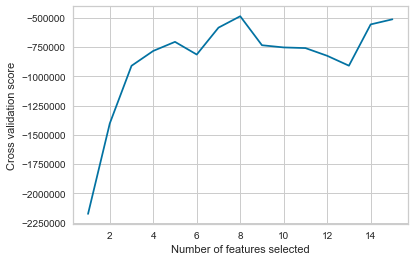

In [41]:
rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(3),
              scoring='neg_mean_absolute_error')
rfecv.fit(rf_data, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [42]:
rfecv.estimator_.feature_importances_ 

array([0.04641857, 0.05705897, 0.03053061, 0.02772822, 0.19056988,
       0.28937292, 0.09432954, 0.26399128])

In [43]:
rfecv.ranking_ 

array([4, 1, 1, 2, 1, 1, 1, 1, 6, 8, 7, 1, 5, 1, 3])

In [44]:
rfecv_rankings = list(zip(rf_data.columns, rfecv.ranking_))

In [45]:
features = [item[0] for item in rfecv_rankings if item[1]==1]

In [46]:
features

['languages',
 'Funny',
 'Courageous',
 'Confusing',
 'Informative',
 'Fascinating',
 'OK',
 'Inspiring']

In [47]:
rf_data = rf_data[features]

In [48]:
sc = StandardScaler()
sc_rf_data = sc.fit_transform(rf_data)

C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(sc_rf_data, y, test_size=0.3, random_state=42)

In [97]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [98]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [99]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [100]:
best_rf = rf_random.best_estimator_

In [101]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [102]:
mean_absolute_error(y_test, best_rf.predict(X_test))

524029.8997874494

In [103]:
text_data = main[["description", "transcript", "title"]]
text_data.head()

,description,transcript,title
0,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you?(Laughter)It's been ...,Do schools kill creativity?
1,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Averting the climate crisis
2,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Simplicity sells
3,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Greening the ghetto
4,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",The best stats you've ever seen


In [104]:
tfidf = TfidfVectorizer()

In [111]:
transcript = tfidf.fit_transform(main["transcript"])

In [112]:
svr_train, svr_test, svry_train, svry_test = train_test_split(transcript, np.log1p(y), test_size=0.3, random_state=42)

In [113]:
best_svr = LinearSVR(C=1.49, dual=True, epsilon=0.0, fit_intercept=True,
       intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
       random_state=42, tol=0.0001, verbose=0)

In [114]:
best_svr.fit(svr_train, svry_train)

LinearSVR(C=1.49, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [115]:
mean_absolute_error(np.expm1(svry_test), np.expm1(best_svr.predict(svr_test)))

857127.2257156542

In [116]:
blended = [np.mean([r, s]) for r, s in zip(best_rf.predict(X_test), best_svr.predict(svr_test))]

In [118]:
mean_absolute_error(y_test, blended)

847337.6607608476